### Regression Exercise 
# Moneyball The NBA
---

### This HW is not easy. TRY IT YOURSELF FIRST! 
Then If you are able to complete it, [watch this lecture series on it](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/playing-moneyball-in-the-nba-recitation/video-1-the-data/). 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [9]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')

test_df = pd.read_csv('data/NBA_test.csv')



# DISPLAY THE FIRST 5 ROWS
df.head()

test_df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [13]:
# Inspect our data using `df.describe()` function.
stats=df.describe()

print(stats)

         SeasonEnd    Playoffs           W           PTS        oppPTS  \
count   835.000000  835.000000  835.000000    835.000000    835.000000   
mean   1996.319760    0.574850   41.000000   8370.239521   8370.239521   
std       9.243808    0.494662   12.740822    581.040114    587.543959   
min    1980.000000    0.000000   11.000000   6901.000000   6909.000000   
25%    1989.000000    0.000000   31.000000   7934.000000   7934.000000   
50%    1996.000000    1.000000   42.000000   8312.000000   8365.000000   
75%    2005.000000    1.000000   50.500000   8784.500000   8768.500000   
max    2011.000000    1.000000   72.000000  10371.000000  10723.000000   

                FG          FGA           2P          2PA          3P  \
count   835.000000   835.000000   835.000000   835.000000  835.000000   
mean   3200.367665  6873.318563  2881.324551  5956.444311  319.043114   
std     287.181266   401.027166   446.097941   830.596327  199.698941   
min    2565.000000  5972.000000  1981.000

#### Check for Nulls.

In [15]:
# Check for Nulls.

null_counts=df.isnull().sum()

print(null_counts)

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64


#### Check for Duplicates

In [20]:
# Check for Duplicates
duplicates_count=df.duplicated().sum()

print(duplicates_count)

0


#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [25]:
def inspect_dataframe(input_df):

    print(df.describe())

    print(df.isnull().sum())

    print(df.duplicated().sum())

inspect_dataframe(df)


         SeasonEnd    Playoffs           W           PTS        oppPTS  \
count   835.000000  835.000000  835.000000    835.000000    835.000000   
mean   1996.319760    0.574850   41.000000   8370.239521   8370.239521   
std       9.243808    0.494662   12.740822    581.040114    587.543959   
min    1980.000000    0.000000   11.000000   6901.000000   6909.000000   
25%    1989.000000    0.000000   31.000000   7934.000000   7934.000000   
50%    1996.000000    1.000000   42.000000   8312.000000   8365.000000   
75%    2005.000000    1.000000   50.500000   8784.500000   8768.500000   
max    2011.000000    1.000000   72.000000  10371.000000  10723.000000   

                FG          FGA           2P          2PA          3P  \
count   835.000000   835.000000   835.000000   835.000000  835.000000   
mean   3200.367665  6873.318563  2881.324551  5956.444311  319.043114   
std     287.181266   401.027166   446.097941   830.596327  199.698941   
min    2565.000000  5972.000000  1981.000

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

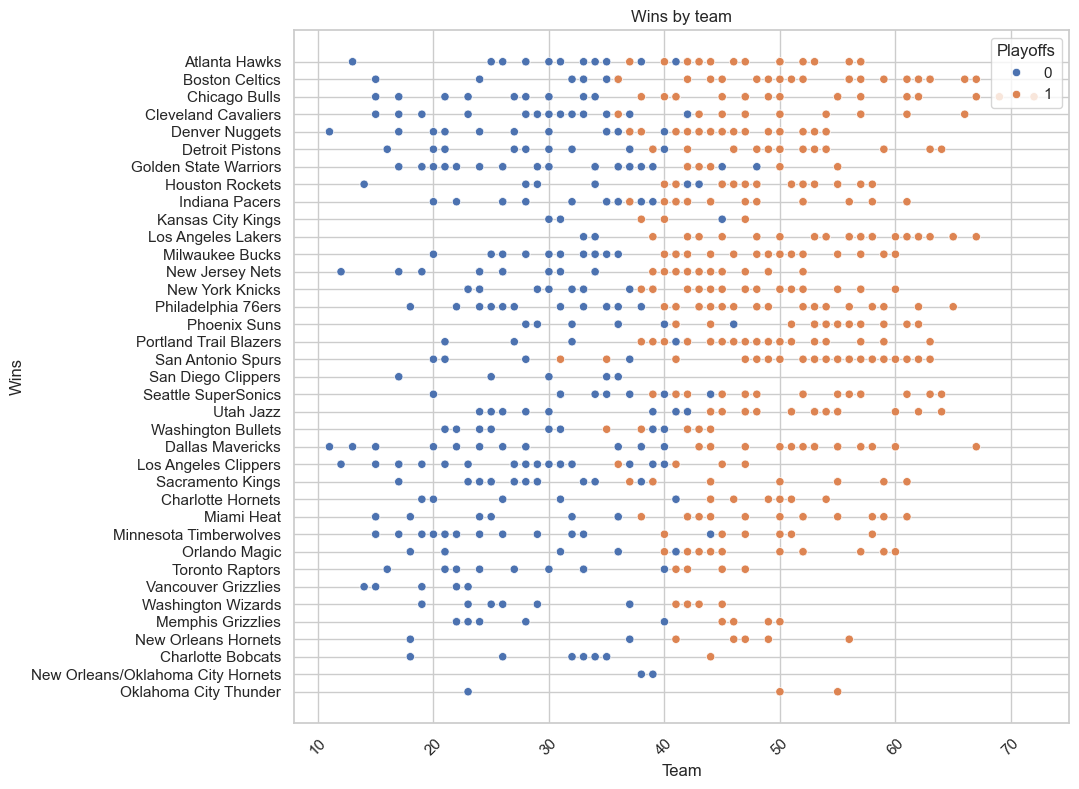

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,9))
scatter_plot=sns.scatterplot(data=df, x='W', y='Team', hue='Playoffs')

plt.title("Wins by team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.legend(title='Playoffs', loc='upper right')
plt.xticks(rotation=45)

plt.show()


#### Take a rough estimate, and now use that moving forward.  



In [35]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [41]:
features = ['2PA', '3PA', 'FTA', 'W']  # Add other relevant columns as needed
X = df[features]
y = df['PTS']

# Convert categorical columns if needed
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2:.2f}')

NameError: name 'r2_score' is not defined